In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import plotly.express as px


In [52]:
import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [53]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

# Convert to Pandas DataFrame
df = pd.DataFrame(data=X, columns=adult.feature_names)
df['income'] = y

# View the first few rows of the DataFrame
df.head(10)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [54]:
df.shape

(48842, 15)

In [55]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [56]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [57]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [58]:
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [59]:
df['workclass'].value_counts()


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [60]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [61]:
df['native-country'].value_counts()


native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [62]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Handeling Missing Values

In [63]:
df['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [64]:
# Clean up the 'income' column
df['income'] = df['income'].str.rstrip('.')
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [65]:
# Replace '?' with mode for remaining columns

df["workclass"]=df["workclass"].replace('?','Private')
df['occupation']=df['occupation'].replace('?','Prof-specialty')
df['native-country']=df['native-country'].replace('?','United-States')

In [66]:
df['workclass'].value_counts()

workclass
Private             35742
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [67]:
df['occupation'].value_counts()

occupation
Prof-specialty       8015
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [68]:
df['native-country'].value_counts()

native-country
United-States                 44415
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [69]:
# Replace null values with mode for remaining columns
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

# Verify null values
print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [70]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

# Remove duplicate rows
df = df.drop_duplicates()

# Verify that duplicate rows are removed
print("Number of rows after removing duplicates:", len(df))


Number of duplicate rows: 53
Number of rows after removing duplicates: 48789


In [71]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Feature Engineering

In [72]:
df['education'].value_counts()

education
HS-grad         15770
Some-college    10862
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

In [73]:
#education Catagory 
df.education = df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th'], 'Pre-HighSchool')
df.education = df.education.replace(['9th', '10th', '11th', '12th','HS-grad'], 'High School')
df.education = df.education.replace(['Some-college','Assoc-acdm', 'Assoc-voc'], 'College')

df['education'].value_counts()

education
High School       20382
College           14523
Bachelors          8013
Masters            2656
Pre-HighSchool     1787
Prof-school         834
Doctorate           594
Name: count, dtype: int64

In [74]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22366
Never-married            16081
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64

In [75]:
#marital-status catagory
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')
df['marital-status'].value_counts()

marital-status
Married          23030
Never-married    16081
Divorced          6630
Separated         1530
Widowed           1518
Name: count, dtype: int64

In [76]:
df['income'] = df['income'].replace('<=50K', 0).replace('>50K', 1)

In [77]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [78]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 48789 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48789 non-null  int64 
 1   workclass       48789 non-null  object
 2   fnlwgt          48789 non-null  int64 
 3   education       48789 non-null  object
 4   education-num   48789 non-null  int64 
 5   marital-status  48789 non-null  object
 6   occupation      48789 non-null  object
 7   relationship    48789 non-null  object
 8   race            48789 non-null  object
 9   sex             48789 non-null  object
 10  capital-gain    48789 non-null  int64 
 11  capital-loss    48789 non-null  int64 
 12  hours-per-week  48789 non-null  int64 
 13  native-country  48789 non-null  object
 14  income          48789 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.0+ MB
None


Data Visualization

In [79]:
# Select numeric columns only
numeric_columns = df.select_dtypes('number')

# Calculate correlation matrix for numeric columns
numeric_columns.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076460,0.030634,0.077183,0.056833,0.071224,0.230134
fnlwgt,-0.076460,1.000000,-0.038727,-0.003716,-0.004379,-0.013521,-0.006313
education-num,0.030634,-0.038727,1.000000,0.125219,0.080985,0.143915,0.332803
capital-gain,0.077183,-0.003716,0.125219,1.000000,-0.031476,0.082152,0.223046
capital-loss,0.056833,-0.004379,0.080985,-0.031476,1.000000,0.054430,0.147540
hours-per-week,0.071224,-0.013521,0.143915,0.082152,0.054430,1.000000,0.227664
income,0.230134,-0.006313,0.332803,0.223046,0.147540,0.227664,1.000000


<Axes: >

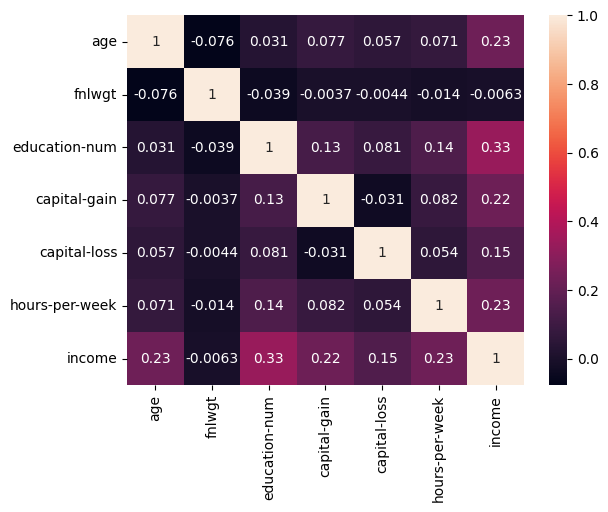

In [80]:
sns.heatmap(numeric_columns.corr(), annot = True)

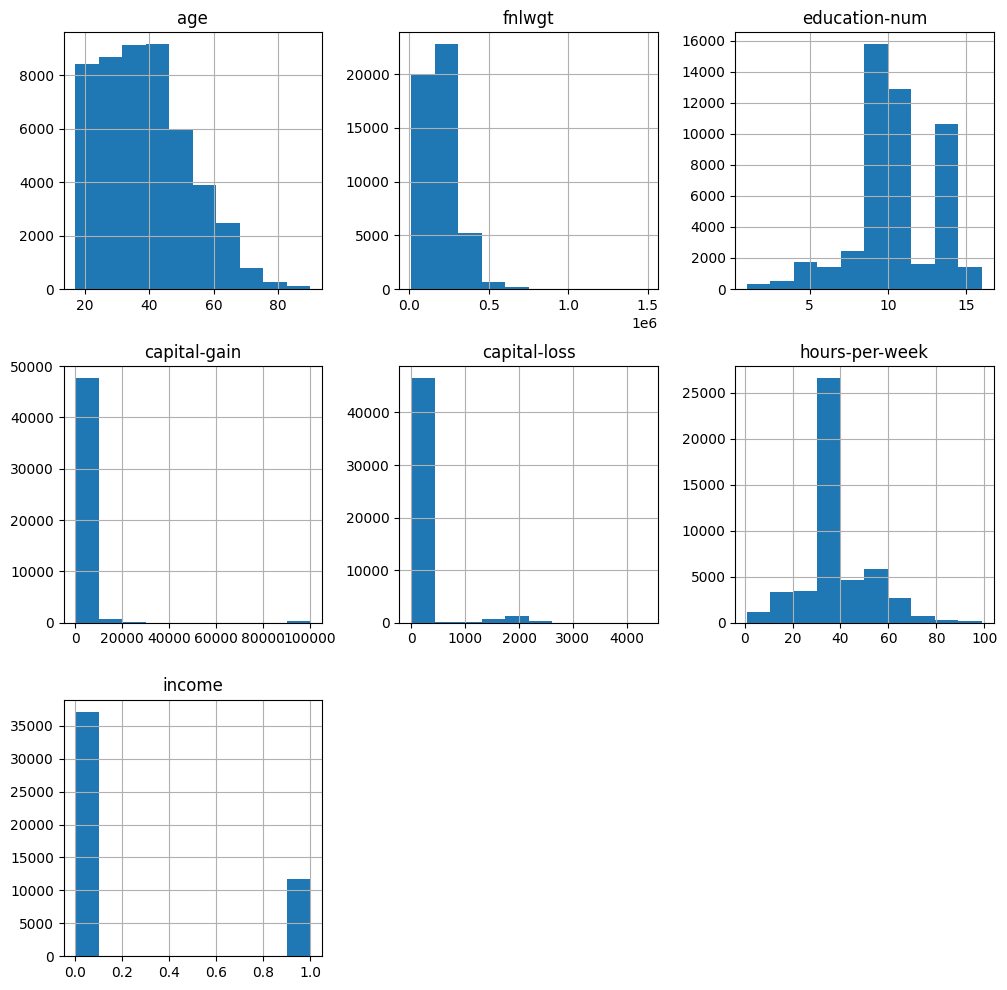

In [81]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

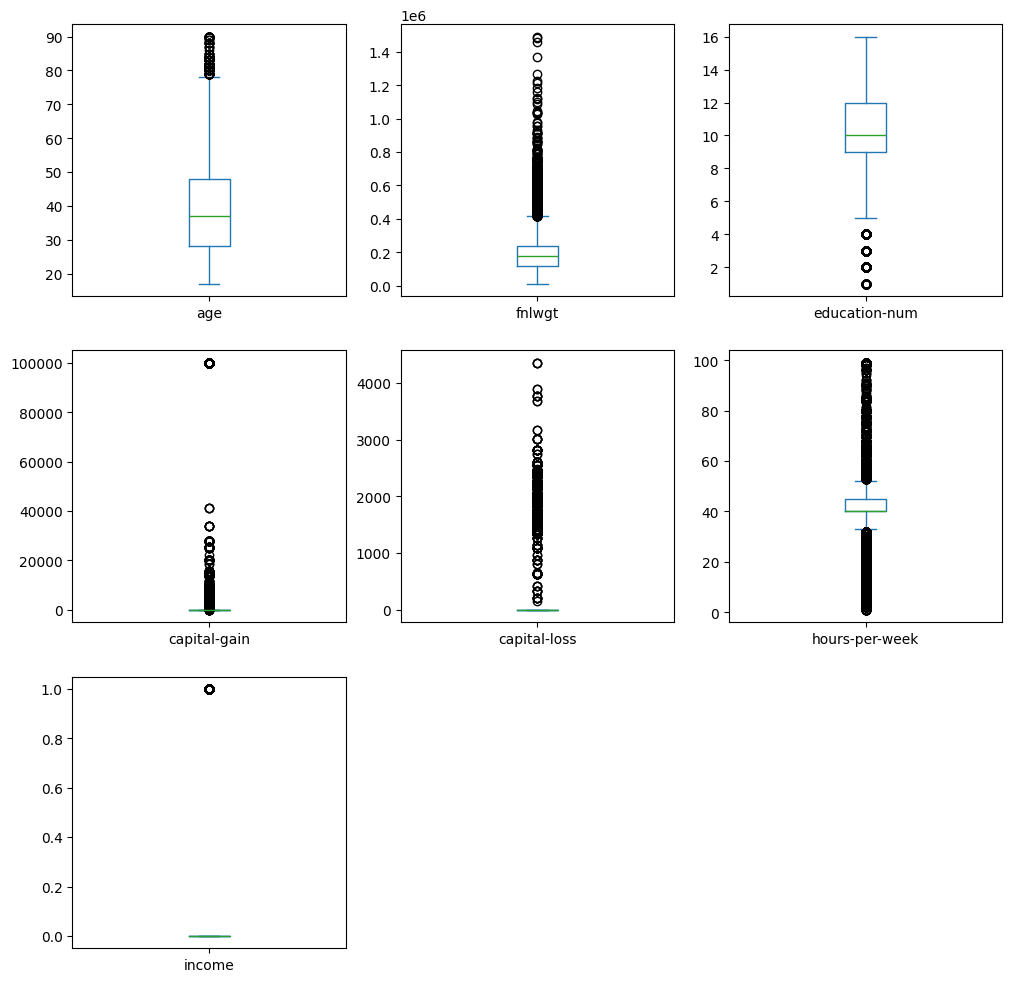

In [82]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

Model Building

In [83]:
X = df.drop(['income'],axis=1)
y = df['income']

Fearure Scaling

In [84]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [85]:
df_1 = df.copy()
df_1 = df_1.apply(LabelEncoder().fit_transform)
df_1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,3461,0,12,2,0,1,4,1,27,0,39,38,0
1,33,5,3788,0,12,1,3,0,4,1,0,0,12,38,0
2,21,3,18342,3,8,0,5,1,4,1,0,0,39,38,0
3,36,3,19995,3,6,1,5,0,2,1,0,0,39,38,0
4,11,3,25405,0,12,1,9,5,2,0,0,0,39,4,0


In [86]:
std_scl = StandardScaler().fit(df_1.drop('income', axis=1))

In [87]:
X = std_scl.transform(df_1.drop('income', axis=1))
y = df['income']

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only to avoid data leakage
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

Random Forest Classification

In [105]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rafoc = RandomForestClassifier()
# Fit the model to the training data
model_1 = rafoc.fit(X_train,y_train)
# Make predictions on the test data
prediction_1 = model_1.predict(X_test)

# Print the accuracy on the training data
print('Accuracy on training data: {:.3f}'.format(rafoc.score(X_train,y_train)))
# Print the accuracy on the testing data
print('Accuracy on testing data: {:.3f}'.format(rafoc.score(X_test,y_test)))

Accuracy on training data: 1.000
Accuracy on testing data: 0.853


In [106]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Fit the model to the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
best_rf_test_pred = best_rf_classifier.predict(X_test)

# Print the accuracy on the training data
print('Accuracy on training data: {:.3f}'.format(best_rf_classifier.score(X_train, y_train)))
# Print the accuracy on the testing data
print('Accuracy on testing data: {:.3f}'.format(best_rf_classifier.score(X_test, y_test)))


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy on training data: 0.918
Accuracy on testing data: 0.860


In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [109]:
print(classification_report(y_test, best_rf_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11014
           1       0.79      0.60      0.68      3623

    accuracy                           0.86     14637
   macro avg       0.83      0.77      0.80     14637
weighted avg       0.85      0.86      0.85     14637



[[10420   594]
 [ 1450  2173]]


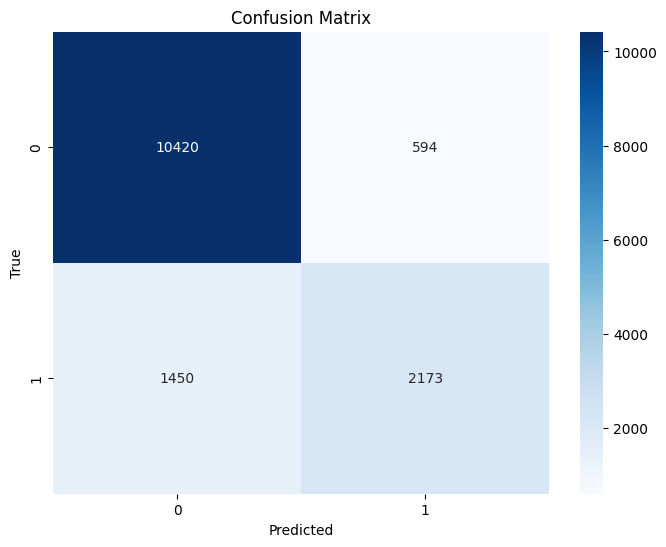

In [113]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, best_rf_test_pred)

print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


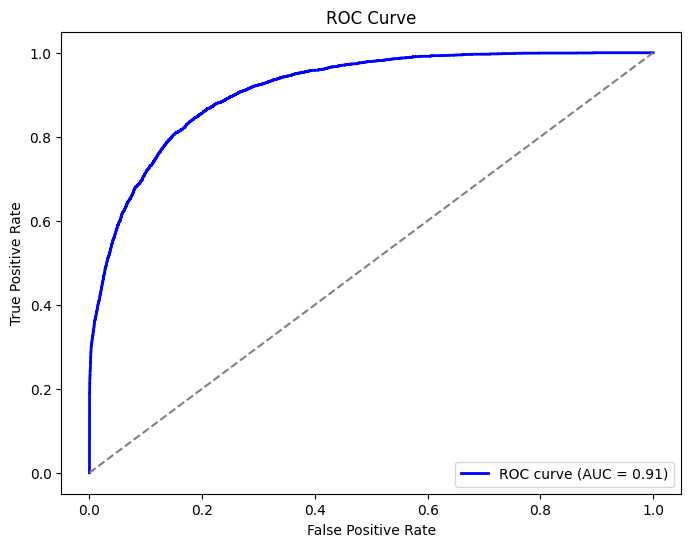

In [115]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


# Plot ROC curve
y_probs = best_rf_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Naïve Bayes Model

In [95]:
from sklearn.naive_bayes import GaussianNB

In [116]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naïve Bayes model
Nab_model = GaussianNB()
# Fit the model to the training data
model_2 = Nab_model.fit(X_train, y_train)
# Make predictions on the test data
prediction_2 = model_2.predict(X_test)

# Print the accuracy on the training data
print('Accuracy on training data: {:.3f}'.format(Nab_model.score(X_train, y_train)))
# Print the accuracy on the testing data
print('Accuracy on testing data: {:.3f}'.format(Nab_model.score(X_test, y_test)))


Accuracy on training data: 0.823
Accuracy on testing data: 0.814


In [117]:
print(classification_report(y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11014
           1       0.68      0.47      0.56      3623

    accuracy                           0.81     14637
   macro avg       0.76      0.70      0.72     14637
weighted avg       0.80      0.81      0.80     14637



[[10205   809]
 [ 1920  1703]]


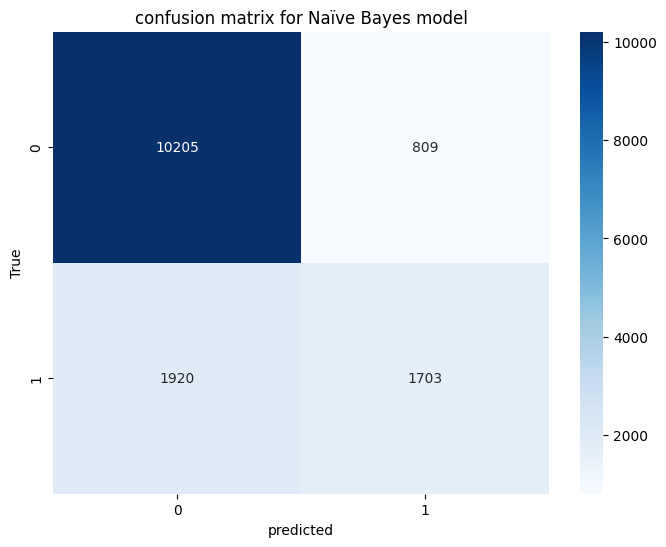

In [118]:
#calculate confusion matrix
cm_2 = confusion_matrix(y_test, prediction_2)
print(cm_2)

#plot confuction matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_2, annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted')
plt.ylabel('True')
plt.title('confusion matrix for Naïve Bayes model')
plt.show()

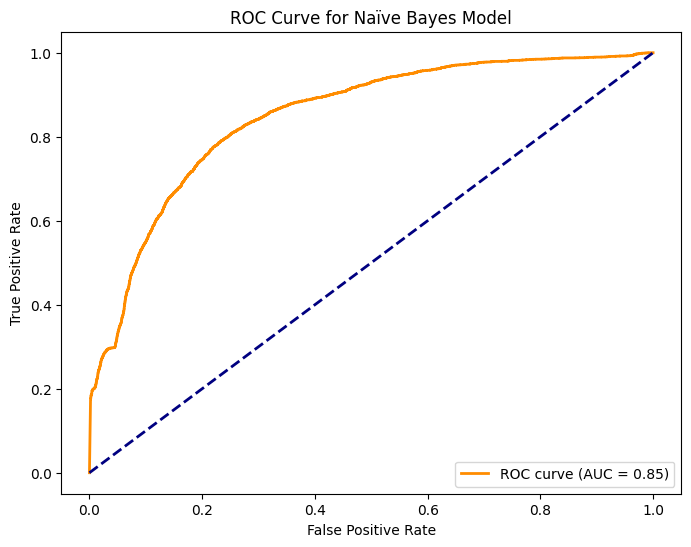

In [119]:
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities for each class
probs = model_2.predict_proba(X_test)

# Compute ROC curve and AUC for positive class
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naïve Bayes Model')
plt.legend(loc='lower right')
plt.show()
